# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [26]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/NathanAsh_cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [27]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))
city

614


'northam'

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [28]:
params = {
    'city': cities,
    'key': weather_api_key
}


city_df = pd.DataFrame({
    "City" :cities
})


city_df["Lat"] = ""
city_df["Lng"] = ""
city_df["Max Temp"] = ""
city_df["Humidity"] = ""
city_df["Cloudiness"] = ""
city_df["Wind Speed"] = ""
city_df["Country"] = ""
city_df["Date"] = ""
dinde =[]


set = 1
count = 1

for index,row in city_df.iterrows():
    url = f"http://api.openweathermap.org/data/2.5/weather?q={row[0]}&appid={params['key']}"
    check = requests.get(url)
    try:
        city_df.loc[index, "Lat"] = check.json()['coord']['lat']
        city_df.loc[index,"Lng"] = check.json()['coord']['lon']
        city_df.loc[index,"Max Temp"] = check.json()['main']['temp_max']
        city_df.loc[index,"Humidity"] = check.json()['main']['humidity']
        city_df.loc[index,"Cloudiness"] = check.json()['clouds']['all']
        city_df.loc[index,"Wind Speed"] = check.json()['wind']['speed']
        city_df.loc[index,"Country"] = check.json()['sys']['country']
        city_df.loc[index,"Date"] = check.json()['dt']
        city_df.loc[index,'Country'] = check.json()['sys']['country']
        print(f'Processing Record {count} of Set {set} | {row[0]}')
        count += 1
        if count == 50:
            count = 0
            set += 1
    except:
        print(f'Failed: missing result | {row[0]}')
        dinde.append(index)
#         city_df.drop(city_df.index[index])
###Deleted rows here but they arent going away


for i in range(len(dinde)):
    city_df.drop(city_df.index[i],inplace = True)

city_df.head()
  



Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | hermanus
Processing Record 3 of Set 1 | khatanga
Processing Record 4 of Set 1 | saint george
Processing Record 5 of Set 1 | lebu
Failed: missing result | illoqqortoormiut
Processing Record 6 of Set 1 | nikolskoye
Processing Record 7 of Set 1 | port macquarie
Processing Record 8 of Set 1 | kapaa
Processing Record 9 of Set 1 | najran
Processing Record 10 of Set 1 | southbridge
Processing Record 11 of Set 1 | piacabucu
Processing Record 12 of Set 1 | ahipara
Processing Record 13 of Set 1 | ostrovnoy
Processing Record 14 of Set 1 | pando
Processing Record 15 of Set 1 | irawan
Processing Record 16 of Set 1 | humpolec
Processing Record 17 of Set 1 | upernavik
Processing Record 18 of Set 1 | roald
Processing Record 19 of Set 1 | key west
Processing Record 20 of Set 1 | abalak
Processing Record 21 of Set 1 | silver city
Failed: missing result | attawapiskat
Processing Record 22 of Set 1 | olavarria
Processing Record 23 

Processing Record 33 of Set 4 | collie
Processing Record 34 of Set 4 | teya
Processing Record 35 of Set 4 | edwardsville
Processing Record 36 of Set 4 | gizo
Processing Record 37 of Set 4 | nadym
Processing Record 38 of Set 4 | provideniya
Processing Record 39 of Set 4 | eston
Processing Record 40 of Set 4 | severodvinsk
Processing Record 41 of Set 4 | quelimane
Failed: missing result | amderma
Processing Record 42 of Set 4 | carauari
Processing Record 43 of Set 4 | lagunas
Processing Record 44 of Set 4 | quatre cocos
Processing Record 45 of Set 4 | sao jose da coroa grande
Failed: missing result | maghama
Processing Record 46 of Set 4 | pacific grove
Processing Record 47 of Set 4 | rodrigues alves
Processing Record 48 of Set 4 | kaitangata
Processing Record 49 of Set 4 | khakhea
Failed: missing result | chagda
Processing Record 0 of Set 5 | general pico
Processing Record 1 of Set 5 | klaksvik
Processing Record 2 of Set 5 | muisne
Processing Record 3 of Set 5 | saint-pierre
Processing 

Processing Record 18 of Set 8 | le port
Processing Record 19 of Set 8 | lavrentiya
Processing Record 20 of Set 8 | maunabo
Processing Record 21 of Set 8 | tautira
Processing Record 22 of Set 8 | rabo de peixe
Processing Record 23 of Set 8 | villa carlos paz
Processing Record 24 of Set 8 | soria
Processing Record 25 of Set 8 | kholm
Processing Record 26 of Set 8 | lata
Processing Record 27 of Set 8 | ardino
Processing Record 28 of Set 8 | hambantota
Processing Record 29 of Set 8 | romanovka
Processing Record 30 of Set 8 | falmouth
Processing Record 31 of Set 8 | nuuk
Processing Record 32 of Set 8 | edd
Processing Record 33 of Set 8 | casale monferrato
Processing Record 34 of Set 8 | gat
Processing Record 35 of Set 8 | chuy
Processing Record 36 of Set 8 | kuliyapitiya
Processing Record 37 of Set 8 | aparecida do taboado
Processing Record 38 of Set 8 | cajaruro
Processing Record 39 of Set 8 | cap malheureux
Failed: missing result | karkaralinsk
Processing Record 40 of Set 8 | wanning
Proc

Processing Record 7 of Set 12 | palestina
Processing Record 8 of Set 12 | chicama
Processing Record 9 of Set 12 | panagar
Processing Record 10 of Set 12 | waipawa
Processing Record 11 of Set 12 | zhangjiakou
Processing Record 12 of Set 12 | tabou
Processing Record 13 of Set 12 | northam


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,hermanus,-34.42,19.23,285.93,87,99,3.58,ZA,1597460257
3,saint george,37.1,-113.58,312.15,13,1,4.6,US,1597460021
5,illoqqortoormiut,,,,,,,,
7,port macquarie,-31.43,152.92,295.37,35,0,2.24,AU,1597460259
9,najran,17.49,44.13,302.15,25,20,2.1,SA,1597460259


In [29]:
# print(city_df.count())

# for i in range(len(dinde)):
#     city_df.drop(city_df.index[i],inplace = True)
print(len(dinde))  
city_df.count()

51


City          563
Lat           563
Lng           563
Max Temp      563
Humidity      563
Cloudiness    563
Wind Speed    563
Country       563
Date          563
dtype: int64

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [30]:
city_df.count()

City          563
Lat           563
Lng           563
Max Temp      563
Humidity      563
Cloudiness    563
Wind Speed    563
Country       563
Date          563
dtype: int64

In [31]:
city_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,hermanus,-34.42,19.23,285.93,87,99,3.58,ZA,1597460257
3,saint george,37.1,-113.58,312.15,13,1,4.6,US,1597460021
5,illoqqortoormiut,,,,,,,,
7,port macquarie,-31.43,152.92,295.37,35,0,2.24,AU,1597460259
9,najran,17.49,44.13,302.15,25,20,2.1,SA,1597460259


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [32]:

print(len(city_df))
city_df['Humidity']  = pd.to_numeric(city_df['Humidity'])
print((city_df['Humidity']))
# for index,row in city_df.iterrows():
city_df['Humidity'].gt(100).value_counts()



563
1      87.0
3      13.0
5       NaN
7      35.0
9      25.0
       ... 
609    94.0
610    61.0
611    55.0
612    81.0
613    96.0
Name: Humidity, Length: 563, dtype: float64


False    563
Name: Humidity, dtype: int64

In [33]:
#  Get the indices of cities that have humidity over 100%.


In [34]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clcity = city_df.loc[city_df['Humidity'].gt(100)==False]
clcity

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,hermanus,-34.42,19.23,285.93,87.0,99,3.58,ZA,1597460257
3,saint george,37.1,-113.58,312.15,13.0,1,4.6,US,1597460021
5,illoqqortoormiut,,,,NaN,,,,
7,port macquarie,-31.43,152.92,295.37,35.0,0,2.24,AU,1597460259
9,najran,17.49,44.13,302.15,25.0,20,2.1,SA,1597460259
...,...,...,...,...,...,...,...,...,...
609,panagar,23.3,79.98,297.15,94.0,90,3.1,IN,1597460440
610,waipawa,-41.41,175.52,283.71,61.0,0,2.6,NZ,1597460440
611,zhangjiakou,40.81,114.88,298.86,55.0,98,3.93,CN,1597460441
612,tabou,4.42,-7.35,297.9,81.0,100,4.24,CI,1597460441


In [35]:
# Extract relevant fields from the data frame
#convert Kelvin to F


rcity = clcity[['City','Lat','Lng',"Max Temp",'Humidity', 'Cloudiness','Wind Speed','Country' ]]
rcity = rcity.dropna(how = 'any')
rcity = pd.DataFrame(rcity)
rcity['Max Temp']  = pd.to_numeric(rcity['Max Temp'],errors = 'coerce')
rcity['Max Temp'] = (rcity['Max Temp']) *9/5 -459.67
rcity = rcity.rename(columns = {
    'Lat': "Latitude",
    'Lng': "Longitude",
    "Max Temp": 'Max Tempurature (F)',
    "Humidity": 'Humidity (%)',
    'Cloudiness' : 'Cloudiness (%)',
    'Wind Speed': 'Wind Speed (mph)'
})

# Export the City_Data into a csv
rcity.to_csv(output_data_file)
rcity

,City,Latitude,Longitude,Max Tempurature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Country
1,hermanus,-34.42,19.23,55.004,87.0,99,3.58,ZA
3,saint george,37.1,-113.58,102.200,13.0,1,4.6,US
7,port macquarie,-31.43,152.92,71.996,35.0,0,2.24,AU
9,najran,17.49,44.13,84.200,25.0,20,2.1,SA
11,piacabucu,-10.41,-36.43,71.798,86.0,0,1.62,BR
...,...,...,...,...,...,...,...,...
609,panagar,23.3,79.98,75.200,94.0,90,3.1,IN
610,waipawa,-41.41,175.52,51.008,61.0,0,2.6,NZ
611,zhangjiakou,40.81,114.88,78.278,55.0,98,3.93,CN
612,tabou,4.42,-7.35,76.550,81.0,100,4.24,CI


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

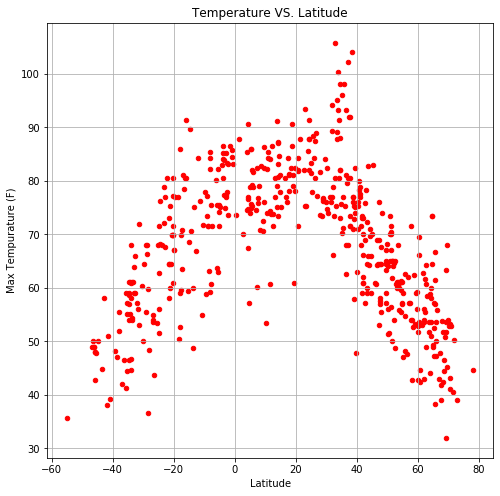

In [37]:
temlat = rcity[['Max Tempurature (F)','Latitude']]

temlat.plot(kind='scatter',x = 'Latitude',y = 'Max Tempurature (F)',
            color = 'red', grid = True,figsize= (8,8))
plt.title(f"Temperature VS. Latitude")
plt.show()

## Latitude vs. Humidity Plot

In [ ]:
humlat = rcity[['Humidity (%)','Latitude']]

humlat.plot(kind='scatter',x = 'Latitude',y = 'Humidity (%)',
            color = 'green', grid = True,figsize= (8,8))
plt.title("Humidity VS. Latitude")
plt.show()

## Latitude vs. Cloudiness Plot

In [ ]:
clolat = rcity[['Cloudiness (%)','Latitude']]

clolat.plot(kind='scatter',x = 'Latitude',y = 'Cloudiness (%)',
            color = 'purple', grid = True,figsize= (8,8))
plt.title("Cloudiness VS. Latitude")
plt.show()

## Latitude vs. Wind Speed Plot

In [ ]:
clolat = rcity[['Wind Speed (mph)','Latitude']]

clolat.plot(kind='scatter',x = 'Latitude',y = 'Wind Speed (mph)',
            color = 'orange', grid = True,figsize= (8,8))
plt.title("Wind Speed VS. Latitude ")
plt.show()

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots
# Create Northern and Southern Hemisphere DataFrames
count = 0
items = ['Max Tempurature (F)','Max Tempurature (F)','Humidity (%)','Humidity (%)',
        'Cloudiness (%)','Cloudiness (%)','Wind Speed (mph)','Wind Speed (mph)']
for i in items:
    if (count %2) ==0:
        Nlat = rcity.loc[temlat['Latitude'].gt(0)==True]
        area = 'North'
    else:
        Nlat = rcity.loc[temlat['Latitude'].gt(0)==False]
        area = 'South'
    Nlat = pd.DataFrame(Nlat)
    Nlat['Latitude']  = pd.to_numeric(Nlat['Latitude'])
    Nlat = pd.DataFrame(Nlat)
    Nlat[i]  = pd.to_numeric(Nlat[i])
    Nlat = pd.DataFrame(Nlat)
    
    count += 1
    
    Corlat = Nlat.corr()
    corlat = round(Corlat['Latitude'][1],3)
    print(f'The Corr coefficient is {corlat}')
      
    x_values = Nlat['Latitude']
    y_values = Nlat[i]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(20,40),fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(i)
    plt.title(f'{area}ern Hemisphere \n {i} Vs. Latitude')
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:

Nlat = temlat.loc[temlat['Latitude'].gt(0)==True]
Nlat = pd.DataFrame(Nlat)
Nlat['Latitude']  = pd.to_numeric(Nlat['Latitude'])
Nlat = pd.DataFrame(Nlat)
Nlat['Max Tempurature (F)']  = pd.to_numeric(Nlat['Max Tempurature (F)'])
Nlat = pd.DataFrame(Nlat)

Corlat = Nlat.corr()
corlat = round(Corlat['Latitude'][0],3)
print(f'The Corr coefficient is {corlat}')
      
x_values = Nlat['Latitude']
y_values = Nlat['Max Tempurature (F)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Tempurature (F)')
plt.title('Max Tempurature Vs. Latitude')
plt.show()